In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import xgboost as xgb

In [3]:
# data
train = pd.read_csv('WithLogsAndNewFeats.csv')
test = pd.read_csv('test.csv')

In [4]:
# make X and y for train test split
X = train.drop(columns = ['SalePrice'])
y = train["SalePrice"]

In [5]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
# set parameters and create model variable
xgtrain = xgb.DMatrix(X_train, label = y)
xgtest = xgb.DMatrix(X_test)

params = {'max_depth':2, 'eta':0.1}
model_xgb = xgb.cv(params, xgtrain, num_boost_round=500, early_stopping_rounds=100)

C:\Users\jdsip\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jdsip\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


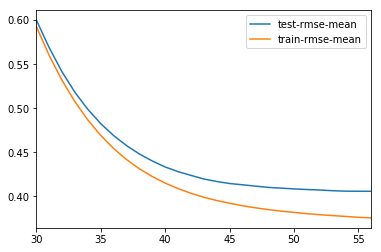

In [7]:
# visual of model rmse test vs. train
model_xgb.loc[30:,['test-rmse-mean', 'train-rmse-mean']].plot()